## Network architecture


|Layer | Size|
|---- |---- |
| Input| 784|
| Hidden| 100|
| Output| 10|


In [1]:
import kipr as kp
import numpy as np
import matplotlib.pyplot as plt

with np.load("C:/Users/kipr/Downloads/mnist.npz") as data:
    train_examples = (data['x_train'].reshape(-1, 28*28, 1)/255).astype(np.float32)
    train_labels = np.zeros((60000, 10))
    np.put_along_axis(train_labels, data['y_train'].reshape(-1, 1), 1, 1)
    train_labels = train_labels.astype(np.float32).reshape(-1, 10, 1)
    test_examples = (data['x_test'].reshape(-1, 28*28, 1)/255).astype(np.float32)
    test_labels = np.zeros((10000, 10))
    np.put_along_axis(test_labels, data['y_test'].reshape(-1, 1), 1, 1)
    test_labels = test_labels.astype(np.float32).reshape(-1, 10, 1)

In [3]:


nb_examples = len(train_labels)

train = kp.arr(train_examples)
labels = kp.arr(train_labels.astype(np.float32))

drelu = lambda x: kp.relu(x) / (kp.relu(x) + kp.arr(0.000000000001))

epochs = 2
batch_size = 128
# learning_rate = kp.arr(0.01)
learnig_rate = 0.01
nb_batches = nb_examples // batch_size



class LinNN:
    
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.W1 = kp.arr('random', shape=[hidden_size, input_size]) - kp.arr(0.5)
        self.b = kp.arr('random', shape=[hidden_size, 1]) - kp.arr(0.5)
        self.W2 = kp.arr('random', shape=[output_size, hidden_size]) - kp.arr(0.5)

    def __call__(self, x):
        return self.W2 @ kp.relu(self.W1 @ x.reshape([self.input_size, 1]) + self.b)

    def step(self, x_batch, y_batch, batch_size):

        s1 = self.W1 @ x_batch
        s2 = s1 + self.b
        s3 = kp.relu(s2)
        s4 = self.W2 @ s3
        s5 = kp.softmax(s4)
        loss = (s5 - y_batch)
        x_entropy = -kp.ln(kp.softmax(s4)*y_batch).sum(-2)

        dW2 = loss @ s3.reshape([batch_size, 1, self.hidden_size])
        
        r1 = loss.reshape([batch_size, 1, self.output_size]) @ self.W2
        r2 = r1.reshape([batch_size, self.hidden_size, 1]) * drelu(s2)

        db = r2

        dW1 = r2 @ x_batch.reshape([batch_size, 1, 784]) 

        self.W1 -= learning_rate * dW1.mean(0)
        self.b -= learning_rate * db.mean(0)
        self.W2 -= learning_rate * dW2.mean(0)
        return x_entropy.mean()
    
    def train(self, train, labels, epochs=1, batch_size=64):
        for k in range(epochs):
            for batch in range(train.shape[0]//batch_size):
                x_batch = train[batch*batch_size : (batch+1)*batch_size]
                y_batch = labels[batch*batch_size : (batch+1)*batch_size]

                print(self.step(x_batch, y_batch, batch_size))
    

nn = LinNN(784, 32, 10)

nn.train(train, labels)


In [34]:
npnn = NPNN(784, 32, 10)
npnn.train(train_examples, train_labels, epochs=5)


0.07609973694494365
0.09058140598763072
0.05037439351998931
0.05
0.05
0.05
0.05
0.055469210417489936
0.05
0.05
0.06894103794715102
0.05
0.05
0.05
0.05
0.05
0.05
0.0578519910776825
0.05
0.05
0.05
0.05
0.05
0.05
0.06671222563876797
0.05
0.0791228734336484
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.1403494058263572
0.05009046305235437
0.05
0.06354441283078271
0.05596234921862464
0.0500062793044489
0.05
0.05
0.05
0.08605563794091022
0.05
0.05
0.05
0.05
0.05
0.09288969828121377
0.05
0.12858999480234218
0.05
0.05
0.08090507294338949
0.05
0.05
0.04961601151134819
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.057790445007915046
0.05
0.05
0.05
0.05
0.05
0.05
0.05
0.054716862240646834
0.05
0.05
0.05001486506882091
0.05
0.05
0.05
0.05
0.05
0.06621044475141138
0.051101369699942
0.062030830754137345
0.05
0.05
0.05
0.05
0.12336107378604932
0.051526318233772336
0.05
0.055013936357464245
0.1333767021599399
0.05
0.07354643212158654
0.05
0.05
0.05
0.05
0.051

Let $l$ be an integer in range $\{0, ..., L\}$ where $L$ is the number of layers in the network.

$$o_l = act(W_l \times o_{l-1} + b_l)$$
$$2L = (o_L - y_{true})^2$$
$$\frac{\partial L}{\partial o_L} = (o_L - y_{true})$$
$$\frac{\partial L}{\partial W_L} = \frac{\partial L}{\partial o_L} \frac{\partial o_L}{\partial W_L} = (o_L - y_{true}) \cdot o_{L-1}$$


$s_1 = W_1 \times x_{batch} \rightarrow (l_{batch}, 100, 1) = (100, 784) \times (l_{batch}, 784, 1)$

$s_2 = s_1 + b \rightarrow (l_{batch}, 100, 1) = (l_{batch}, 100, 1) + (100, 1)$

$s_3 = ReLU(s_2) \rightarrow (l_{batch}, 100, 1)$

$s_4 = W_2 \times s_3 \rightarrow (l_{batch}, 10, 1) = (10, 100) \times (l_{batch}, 100, 1) $

$L = (s_4 - y) \rightarrow (l_{batch}, 10, 1)$

$RMSE = L^2 \rightarrow (1)$


In [13]:
test = kp.arr((test_examples.reshape(-1, 28*28, 1)/255).astype(np.float32))
nb_test = test.shape[0]

test_oh = np.zeros((nb_test, 10))
np.put_along_axis(test_oh, test_labels.reshape(-1, 1), 1, 1)
test_labels = kp.arr(test_oh.astype(np.float32)).reshape([nb_test, 10, 1])

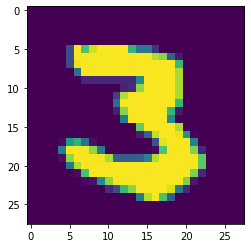

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

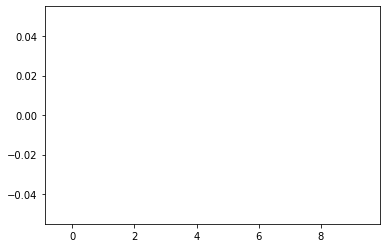

In [52]:
a = np.random.randint(10000)

plt.imshow(test_examples[a].reshape([28, 28]))
plt.show()
plt.bar(range(10), npnn(test_examples[a]).reshape([10]))
print(npnn(test_examples[a]).reshape([10]))
test_labels[a].reshape([10])


In [16]:
test_labels[a]

kipr.arr([[ 0.00000],
          [ 0.00000],
          [ 0.00000],
          [ 0.00000],
          [ 1.00000],
          [ 0.00000],
          [ 0.00000],
          [ 0.00000],
          [ 0.00000],
          [ 0.00000]],
         shape=[ 10, 1])

In [6]:
a = kp.arr('random', shape=[3, 4]) - kp.arr(0.5)

cross_entropy = lambda x: kp.relu(x) / (kp.relu(x) + kp.arr(0.000000000001))
kp.relu(a), 

(kipr.arr([[ 0.025429, 0.000000, 0.000000, 0.48248],
           [ 0.360193, 0.076020, 0.311063, 0.00000],
           [ 0.139960, 0.129520, 0.301791, 0.00000]],
          shape=[ 3, 4]),
 kipr.arr([[ 1.000000, 0.000000, 0.000000, 1.00000],
           [ 1.000000, 1.000000, 1.000000, 0.00000],
           [ 1.000000, 1.000000, 1.000000, 0.00000]],
          shape=[ 3, 4]))

In [100]:


class npNN:

    learning_rate = 0.01

    def __init__(self, i, h, o):
        self.i = i
        self.h = h
        self.o = o
        self.W1 = np.random.randn(h, i)
        self.b = np.random.randn(h, 1)
        self.W2 = np.random.randn(o, h)

    def __call__(self, x):
        a = self.W1 @ x + self.b
        b = self.W2 @ (a * (a > 0))
        return np.exp(b)/np.exp(b).sum(1)[..., np.newaxis]
    
    def step(self, x_batch, y_batch):

        softmax = lambda x: np.exp(x)/np.exp(x).sum(1)[..., np.newaxis]

        f1 = self.W1 @ x_batch                                               # (batch, h, 1) =  (h, i)        x (b, i, 1)
        f2 = f1 + self.b                                                     # (batch, h, 1) =  (batch, h, 1) + (h, 1)
        f3 = f2 * (f2 > 0)                                                   # (batch, h, 1) =  (batch, h, 1)
        # print(f3)
        f4 = self.W2 @ f3                                                    # (batch, o, 1) =  (o, h)        x (batch, h, 1)
        f5 = softmax(f4)
        # print(f5)
        f6 = f5 - y_batch                                                    # (batch, o, 1) =  (batch, o, 1) - (batch, o, 1)
        loss = -(y_batch * np.log(f5)).sum(-1)
        rmse = loss.mean()

        b1 = f6                                                              # (batch, o, 1) =  (batch, o, 1)
        dW2 = b1 @ f3.reshape(-1, 1, self.h)                                 # (batch, o, h) =  (batch, o, 1) x (batch, 1, h)
        b2 = (b1.reshape(-1, 1, self.o) @ self.W2).reshape(-1, self.h, 1)    # (batch, h, 1) = ((batch, 1, o) x (o, h)).reshape(batch, h, 1)
        b3 = b2 * (f2 > 0)                                                   # (batch, h, 1) =  (batch, h, 1)
        db = b3
        dW1 = b3 @ x_batch.reshape(-1, 1, self.i)                            # (batch, h, i) =  (batch, h, 1) x (batch, i, 1)

        # print(dW2, db, dW1)

        self.W1 -= self.learning_rate * dW1.mean(0)
        self.b -= self.learning_rate * db.mean(0)
        self.W2 -= self.learning_rate * dW2.mean(0)

        return rmse

    def fit(self, x_data, y_data, epochs=3, batch_size=64, verbose=20):
            for epoch in range(epochs):
                for batch in range(len(x_data) // batch_size):
                    
                    x_batch = x_data[batch*batch_size:(batch+1)*batch_size]
                    y_batch = y_data[batch*batch_size:(batch+1)*batch_size]

                    loss = self.step(x_batch, y_batch)
                    if batch % verbose == 0:
                        print(loss)

    def accuracy(self, x_test, y_test):

        predictions = self.__call__(x_test)

        success = predictions.argmax(-2) == y_test.argmax(-2)
        return success.mean()



    
npnn = npNN(784, 64, 10)

npnn.fit(train_examples, train_labels,
         epochs=10, verbose=100)

7.626619751655454
1.9204049639715184
0.8406224244829111
0.7639304302556733
0.6730444614020167
0.756616599664713
0.4155443125614734
0.5938917488669857
0.4625152090034351
0.6331221763459108
0.3403438623127058
0.5642885775297596
0.33013916654869035
0.31518735525220326
0.31426353327741163
0.3558215993054685
0.2308010266749707
0.27624722510709293
0.2732830111711008
0.4412212182382042
0.21369634293103507
0.3449391134002993
0.23108975565150872
0.23391417020382219
0.19028022235757022
0.22401584488367524
0.16706540753900911
0.16513161901614654
0.20045671532768577
0.33260784408990285
0.1664490486850318
0.2539065725481777
0.1930788588309705
0.17709341493075614
0.11919114711330381
0.17125681368525533
0.12741444886109637
0.11250482264792425
0.15479089409065444
0.267950911637863
0.13727195529439723
0.2102868551917107
0.1629933278977018
0.14023231272861694
0.07731630767553198
0.14059604914859017
0.0978915822886309
0.08807558552609487
0.12960857925214125
0.22365462846686865
0.11535127540838494
0.17795

In [101]:
npnn.accuracy(test_examples, test_labels)

0.8536

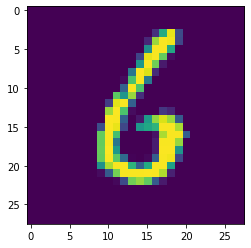

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

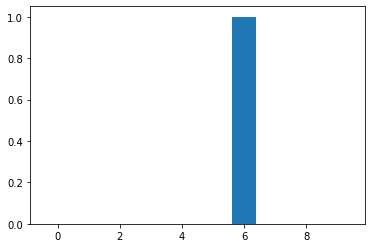

In [109]:
a = np.random.randint(10000)

plt.imshow(test_examples[a].reshape([28, 28]))
plt.show()
plt.bar(range(10), npnn(test_examples[a:a+1]).reshape([10]))
test_labels[a].reshape([10])